<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_1/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
Seja bem-vindo e/ou muito bem-vinda ao meu notebook do projeto/super-desafio do módulo 1!

Nesse módulo aprendemos a fazer buscas em um banco de dados do governo brasileiro, o [**Datasus**](https://http://www2.datasus.gov.br/DATASUS/index.php?area=02), para acessar dados sobre o Sistema Único de Saúde Brasileiro (SUS). O Datasus usa uma ferramenta chamada **tabnet** para tabular os dados de forma a tornar os dados acessíveis e utilizáveis em análises computacionais. Uma ferramenta bastante útil para pesquisas na área da saúde, e, por que não, na área de ciência de dados?

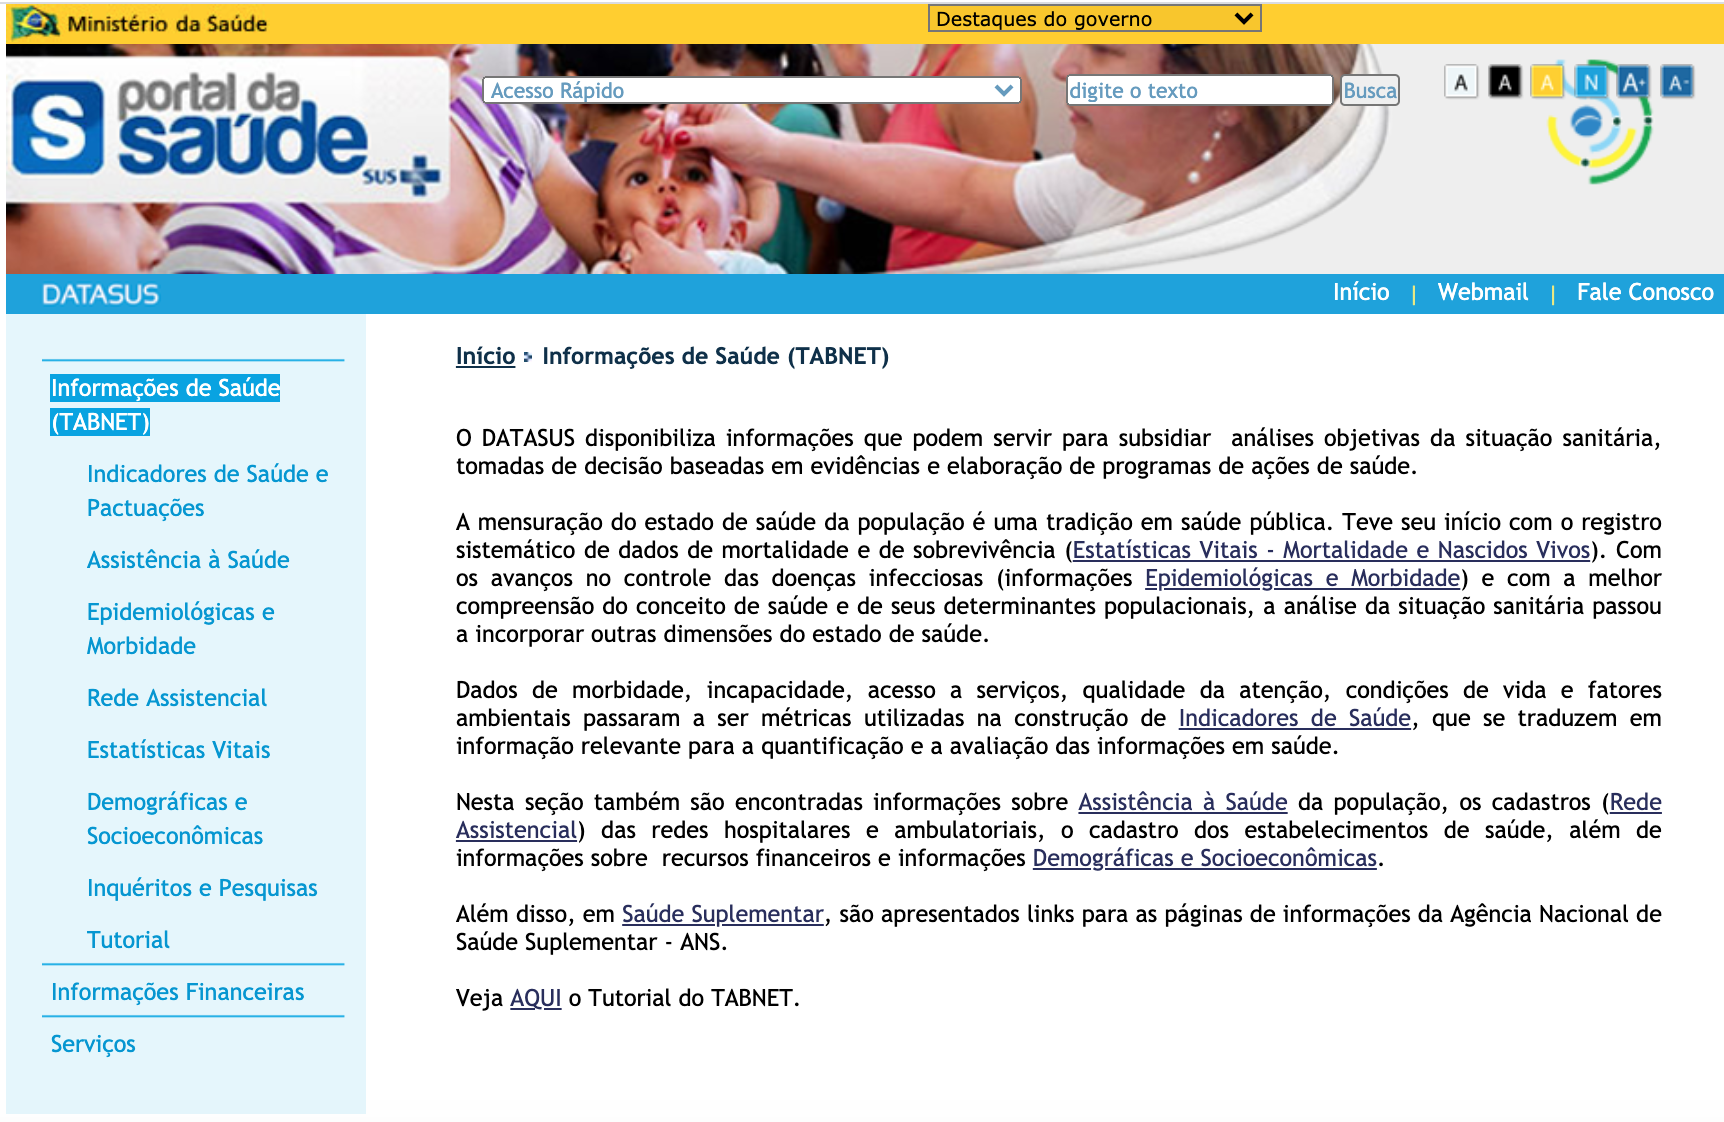

**Tela inicial do Datasus**

## Tema: Vacinas
Para este projeto, escolhi trabalhar com um assunto que está muito em alta atualmente, vacinação! Mas, por enquanto, não estou falando da vacinação contra COVID-19 (#VacinaJá!). A crise provocada pela pandemia de COVID-19 fez ressurgir o interesse pelo assunto vacinação, acompanhado de infelizes notícias falsas e teorias conspiratórias desincentivando o ato de se vacinar.Isso infelizmente tem levado [à quedas nos índices de vacinação](https://saude.abril.com.br/medicina/por-que-as-pessoas-estao-tomando-menos-vacina/), Brasil e mundo afora. Claro, [existem outros fatores socioeconômicos não menos importantes, como o horário limitado dos postos de saúde e rotinas mais intensas de trabalho, que podem ter levado a esse fenômeno de queda.](https://revistapesquisa.fapesp.br/as-razoes-da-queda-na-vacinacao/)

Para o meu projeto, resolvi então analisar os dados de vacinação disponíveis no Datasus. Primeiro, olharemos para o padrão mais geral de vacinação no Brasil, depois examinaremos a nível de região, seguindo por análises mais detalhadas sobre a cobertura vacinal.

## Carregamento de bibliotecas e preparação dos dados:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Os conjuntos de dados obtidos do Datasus serão os seguintes:

*   total_reg_ano = Conjunto total de doses aplicadas, por região e por ano no Brasil;
*   total_reg_ano_ob = Como veremos mais para frente, há alguns problemas com alguns identificadores de pesquisa dos dados de vacina no Datasus, portanto, foi necessário refinar a pesquisa com outros parâmetros;
*   total_imuno = total de doses com identificador do imunizante;
*   total_imuno_ob = total de doses com identificador do imunizante da pesquisa refinada;
*   cobertura_reg_ano = dados de cobertura vacinal por região e ano;
*   cobertura_imuno_ano = dados de cobertura vacinal por imunizante e ano.

A série temporal dos dados de vacinação disponíveis no Datasus tem início no ano de 1994, e vai até os meses mais recentes de 2021 (no momento da confecção deste notebook: Mai/2021). Eu optei por não incluir o ano de 2021 pois a escala da minha pesquisa é por ano, e o ano de 2021 ainda está correndo e não teríamos dados completos. Outro motivo que me fez descartar o ano de 2021 é que a campanha atual de vacinação contra COVID-19 pode estar afetando os indíces de vacinação das outras vacinas, seja por maior alocamento de recursos ou menores taxas de vacinação geradas pelo isolamento social. Importante ressaltar que o isolamento social também pode ter influenciado os dados de vacinação de 2020.


In [2]:
total_reg_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_reg_ano_tudo.csv",
                            encoding = "ISO-8859-1", sep = ";", index_col = 0)

total_reg_ano_ob = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_reg_ano_ob.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0)

total_imuno = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_imuno.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0)

total_imuno_ob = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_imuno_ob.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0)

cobertura_reg_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/cobertura_reg_ano.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0, decimal = ",")

cobertura_imuno_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/cobertura_imuno_ano.csv",
                              encoding = "ISO-8859-1", sep = ";", index_col = 0, decimal = ",")

Podemos notar que os valores de alguns conjuntos de dados estão na unidade de milhões de doses. Para arredondar essa escala e facilitar nossa visualização, realizei a divisão destes valores por 1000000:

In [3]:
total_reg_ano = total_reg_ano/1000000
total_reg_ano_ob = total_reg_ano_ob/1000000
total_imuno = total_imuno/1000000
total_imuno_ob = total_imuno_ob/1000000

#### *Importante ressaltar que, os valores referem-se ao **total** de doses aplicadas, e não ao **número de pessoas vacinadas**.*

## Análises de tendências gerais:
### Total

Vamos primeiro então, analisar o padrão geral do total de milhões de doses aplicadas de 1994 até 2020:

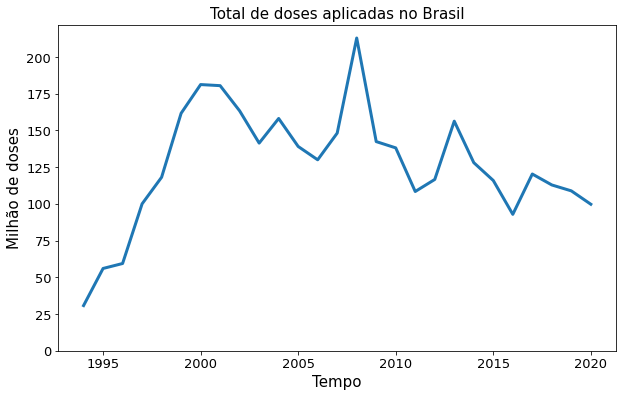

In [4]:
ax = total_reg_ano.iloc[-1,:-1].plot(figsize = (10, 6), linewidth = 3)
plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
plt.title("Total de doses aplicadas no Brasil", fontsize = 15)
plt.ylabel("Milhão de doses", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax.set_ylim(0)
plt.show()

Podemos observar 3 pontos importantes neste gráfico: 


*   Há um aumento expressivo no início da série temporal, o que pode ser devido a diversos fatores não apenas no número absoluto (pessoas se vacinaram mais), mas também aprimoramentos nos sistemas de cadastro de vacinas, maiores e mais informativas campanhas de vacinação, etc.;
*   Há uma certa ciclicidade: há alguns picos seguidos de queda mas em equilíbrio dinâmico;
*   Há uma tendência de queda 2010 para cá, em que os valores em média não parecem atingir o patamar da década de 2000.

Seria essa queda observada de fato resultado de menos pessoas estarem se vacinando, como discutido anteriormente? Será que essa tendência se repete nas diferentes regiões do Brasil? Vamos separar esse gráfico por diferentes regiões do Brasil:

**Como a escala do total é muito discrepante entre as regiões, resolvi plotar cada região separadamente**




### Por regiões:

In [5]:
cores = ["green", "darkorange", "red", "blue", "gold"]

In [6]:
total_reg_ano_nt = total_reg_ano.drop(index = "Total", columns = " Total") # nt = non-total

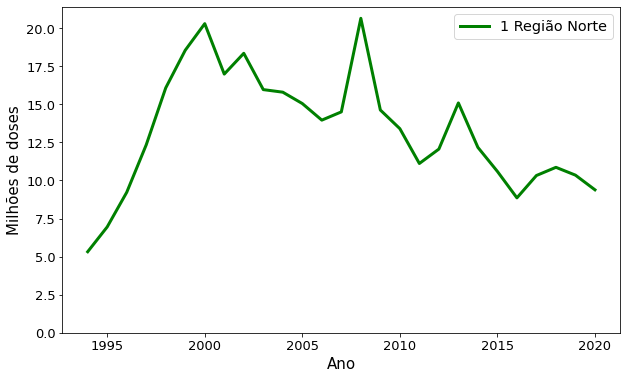

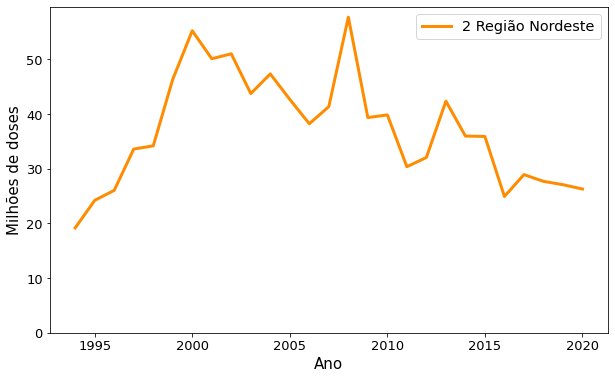

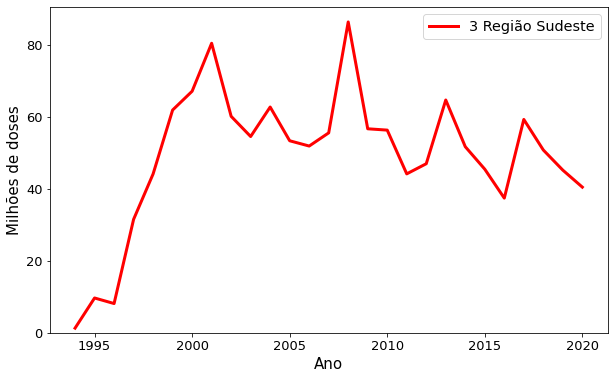

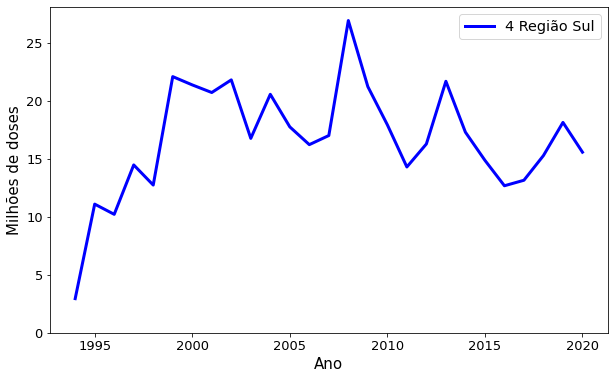

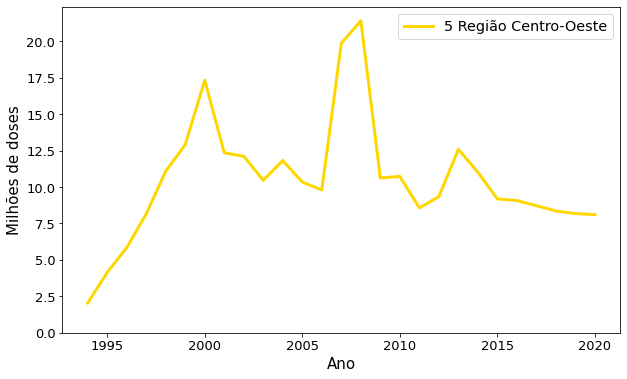

In [16]:
for i in range(total_reg_ano_nt.shape[0]):
    plt.figure(figsize=(10,6))
    ax = total_reg_ano_nt.iloc[i,].plot(color = cores[i], linewidth = 3)
    plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], 
             xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
    ax.set_ylim(0)
    ax.legend(fontsize = "x-large")
    ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
    ax.set_xlabel("Ano", fontsize = 15)
    ax.set_ylabel("Milhões de doses", fontsize = 15)
plt.show()  

Podemos observar que, embora todas as regiões brasileiras apresentem tendência de queda, as regiões Norte e Nordeste parecem apresenta maior queda em relação ao seu própio passado da década de 2000. Não obstante, são as [regiões mais pobres do brasil](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_incid%C3%AAncia_da_pobreza). Isso levanta um alerta vermelho: se os índices de vacinação estão caindo de forma geral, doenças erradicadas ou de [potencial endêmico](https://portalarquivos2.saude.gov.br/images/pdf/2019/setembro/25/boletim-especial-21ago19-web.pdf) podem voltar a circular. 

Porém, como discutido no início, há problemas associados com as pesquisas no portal Datasus. Ao pedir para que o Datasus retorne todos os tipos de imunizantes presentes no banco de dados, o resultado é o seguinte:

In [18]:
print(total_imuno.index)
len(total_imuno.index)

Index(['BCG (BCG)', 'BCG - Hanseníase (BCG)', 'Febre Amarela (FA)',
       'Febre Tifóide (FT)', 'Haemophilus influenzae tipo b (Hib)',
       'Hepatite A (HA)', 'Hepatite B (HB)', 'Hepatite B não soroconversão',
       'Influenza (INF)', 'Influenza (Campanha) (INF)',
       'Influenza (Gestantes) (INF)', 'Meningococo A/C (MnAC)',
       'Meningococo B/C (MnBC)', 'Raiva Humana',
       'Raiva - Cultivo Celular/Diplóide (RC)',
       'Raiva - Cultivo Celular/Vero (RV)',
       'Raiva - Cultivo Celular/Embrionário (RG)', 'Rubéola', 'Sarampo',
       'Varicela', 'Dupla Adulto (dT)', 'Dupla Infantil (DT)',
       'Dupla Viral (rotina) (SR)', 'Dupla Viral (mulheres idade fértil) (SR)',
       'Dupla Viral (mulheres idade fértil campanha) (SR)',
       'Dupla Viral (homens) (SR)', 'Dupla Viral (homens campanha) (SR)',
       'Hexavalente (HX)', 'Poliomielite inativada (VIP)',
       'Meningocócica Conjugada - C (MncC)', 'Oral Poliomielite (VOP)',
       'Oral Poliomielite 1ª etapa campanha  

81

Percebe como parece haver uma certa quantidade de valores redundantes ou não corretamente especificados, como "Hepatite (A)", HEPATITE A, B RECOMBINANTE", diversos tipos de vacina contra raiva (não obrigatórias), soros antiofídicos e antirábicos (não são vacinas), separações por sexo e campanhas (não informativas), e uma seção "ignorados" ? Para lidar com esse conjunto de dados, eu limitei um pouco o resultado da busca para listar somente os imunizantes com melhor informação sobre a categoria do imunizante, ou apenas os imunizantes considerados obrigatórios e parte dos programas nacionais de imunização. Links: [[1]](https://bvsms.saude.gov.br/bvs/publicacoes/cart_vac.pdf), [[2]](https://revistapesquisa.fapesp.br/wp-content/uploads/2018/08/Calend%C3%A1rio_Vacina%C3%A7%C3%A3o_270.pdf), [[3]](https://www.agazeta.com.br/es/cotidiano/veja-quais-sao-as-vacinas-obrigatorias-em-todas-as-fases-da-vida-0920).

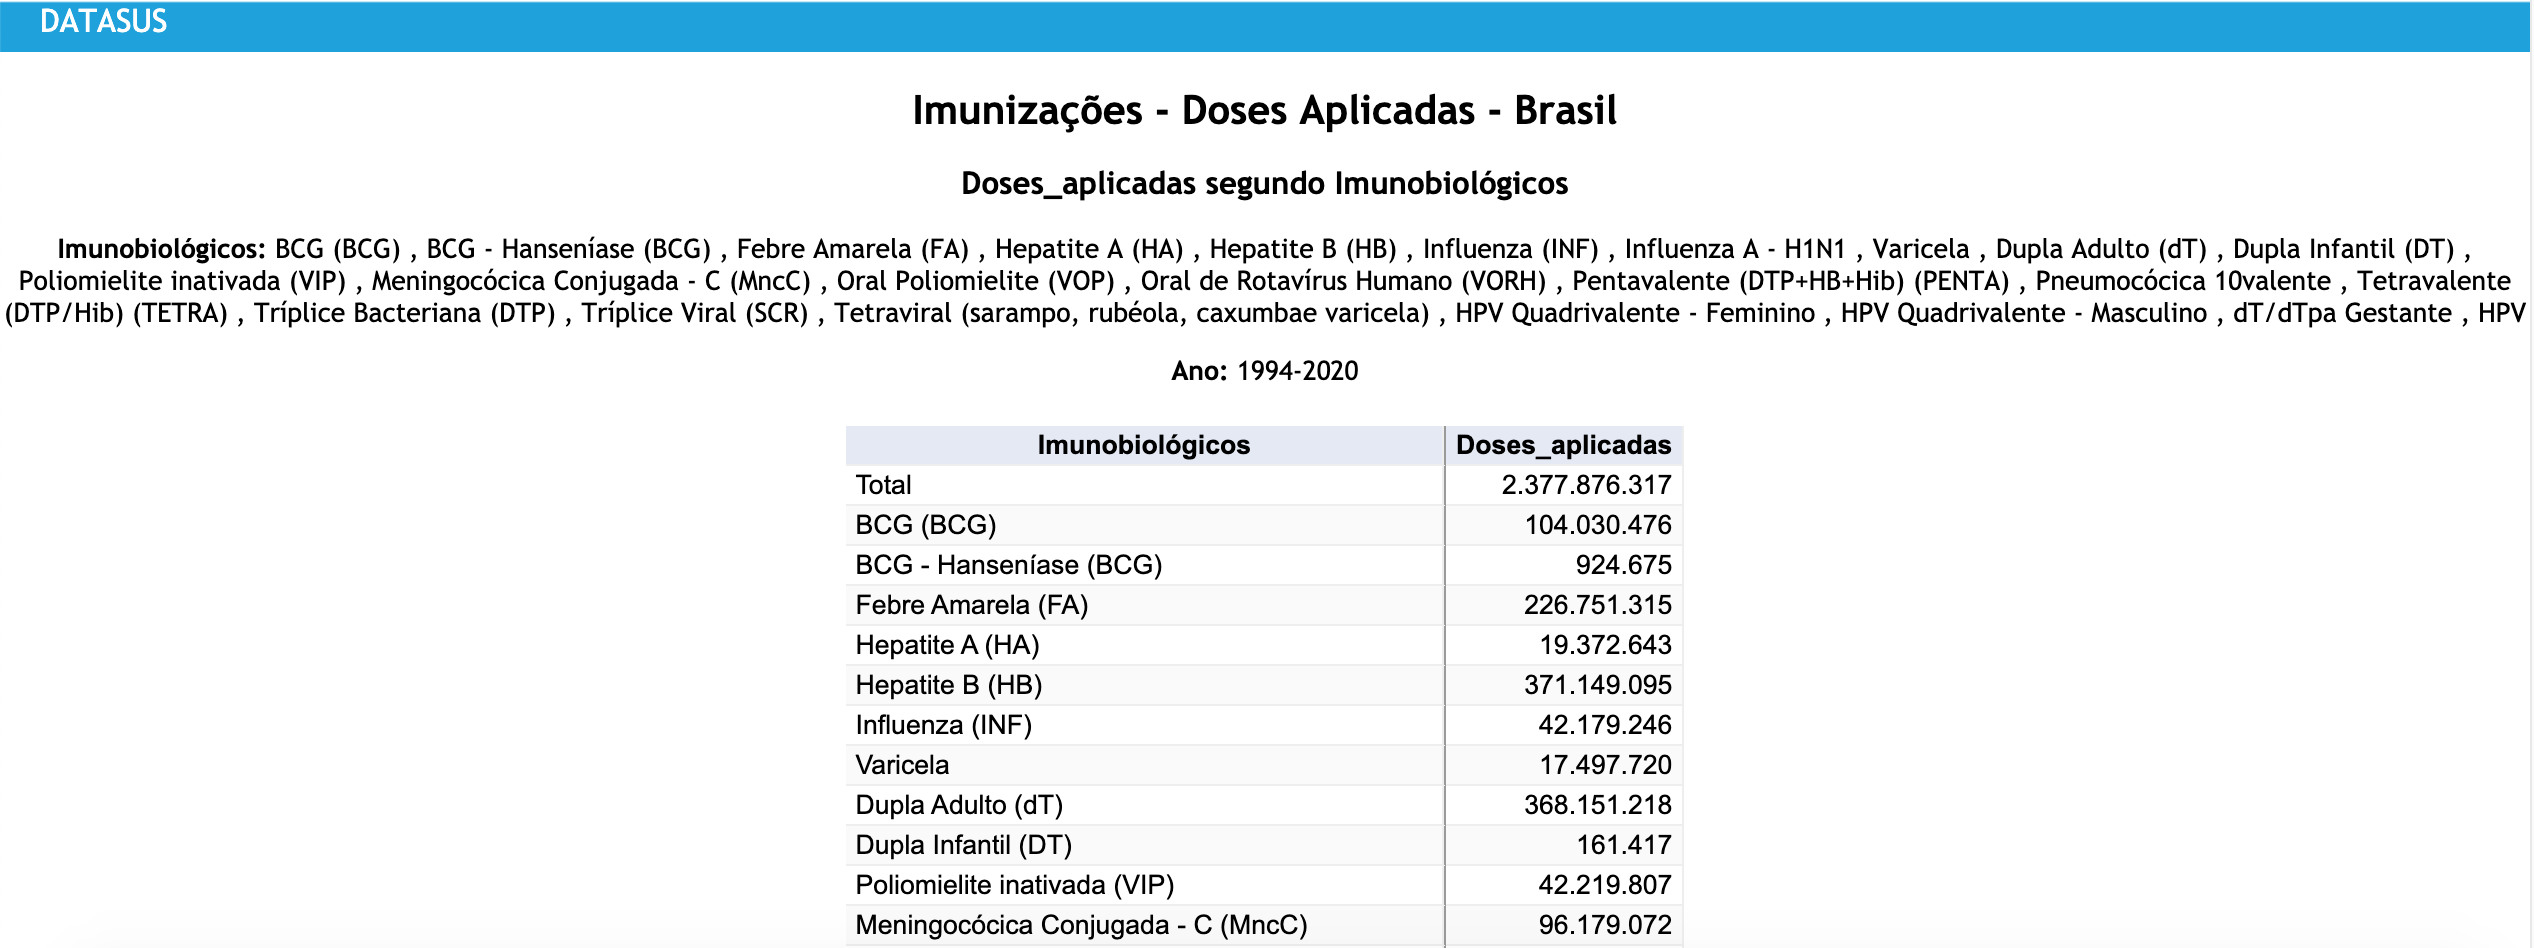

In [19]:
total_imuno_ob.index

Index(['BCG (BCG)', 'BCG - Hanseníase (BCG)', 'Febre Amarela (FA)',
       'Hepatite A (HA)', 'Hepatite B (HB)', 'Influenza (INF)', 'Varicela',
       'Dupla Adulto (dT)', 'Dupla Infantil (DT)',
       'Poliomielite inativada (VIP)', 'Meningocócica Conjugada - C (MncC)',
       'Oral Poliomielite (VOP)', 'Oral de Rotavírus Humano (VORH)',
       'Pentavalente (DTP+HB+Hib) (PENTA)', 'Pneumocócica 10valente',
       'Tetravalente (DTP/Hib) (TETRA)', 'Tríplice Bacteriana (DTP)',
       'Tríplice Viral (SCR)',
       'Tetraviral (sarampo, rubéola, caxumbae varicela)',
       'HPV Quadrivalente - Feminino', 'HPV Quadrivalente - Masculino', 'HPV',
       'Total'],
      dtype='object', name='Imunobiológicos')

Também me baseei nos dados de [cobertura vacinal](http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/f13.pdf), que é outro conjunto de dados que examineramos mais a fundo em breve, mas tentei identificar os mesmos imunizantes listados na sessão de cobertura vacinal:

In [20]:
cobertura_imuno_ano.index

Index(['BCG', 'Hepatite B  em crianças até 30 dias', 'Rotavírus Humano',
       'Meningococo C', 'Hepatite B', 'Penta', 'Pneumocócica', 'Poliomielite',
       'Poliomielite 4 anos', 'Febre Amarela', 'Hepatite A',
       'Pneumocócica(1º ref)', 'Meningococo C (1º ref)',
       'Poliomielite(1º ref)', 'Tríplice Viral  D1', 'Tríplice Viral  D2',
       'Tetra Viral(SRC+VZ)', 'DTP', 'DTP REF (4 e 6 anos)',
       'Tríplice Bacteriana(DTP)(1º ref)', 'Sarampo',
       'Haemophilus influenzae b', 'Dupla adulto e tríplice acelular gestante',
       'dTpa gestante', 'Tetravalente (DTP/Hib) (TETRA)', 'Ignorado', 'Total'],
      dtype='object', name='Imuno')

### Por imunizantes da pesquisa refinada:

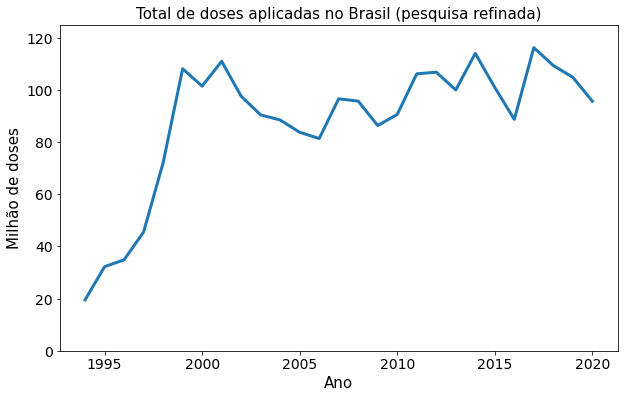

In [24]:
ax = total_reg_ano_ob.iloc[-1,:-1].plot(figsize = (10, 6), linewidth = 3)
plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
plt.title("Total de doses aplicadas no Brasil (pesquisa refinada)", fontsize = 15)
plt.ylabel("Milhão de doses", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.set_ylim(0, 125)
plt.show()

Curioso! Agora, parece que não temos mais uma tendência de queda tão intensa quanto notada anteriormente, ao longo da última década. Há uma tendência de queda nos últimos 4,5 anos apenas. Essa queda poderia ser explicada pelas variações cíclicas que observamos ao longo de toda a série temporal? E se olharmos para as regiões novamente?

In [25]:
total_reg_ano_ob_nt = total_reg_ano_ob.drop(index = "Total", columns = " Total")

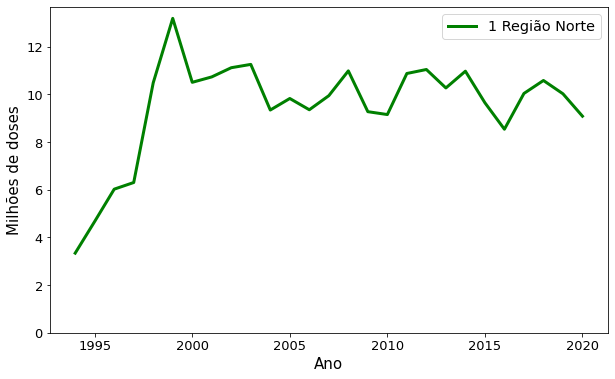

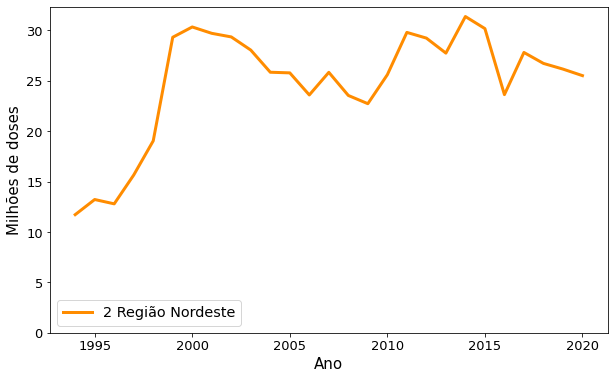

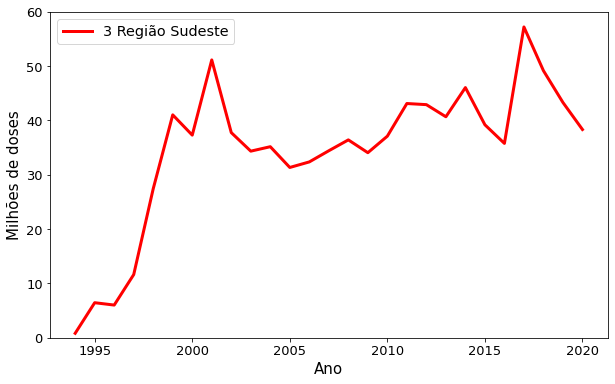

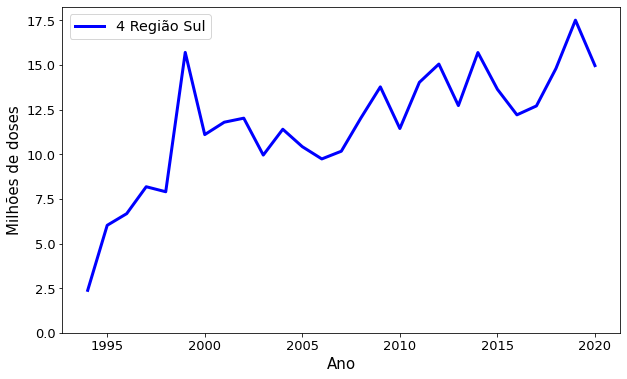

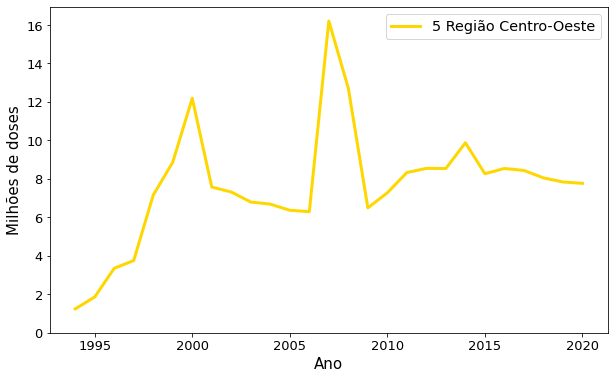

In [36]:
for i in range(total_reg_ano_ob_nt.shape[0]):
    plt.figure(figsize=(10,6))
    ax = total_reg_ano_ob_nt.iloc[i,].plot(color = cores[i], linewidth = 3)
    plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], 
             xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
    ax.set_ylim(0)
    ax.legend(fontsize = "x-large")
    ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
    ax.set_xlabel("Ano", fontsize = 15)
    ax.set_ylabel("Milhões de doses", fontsize = 15)
plt.show()

Certo. Os padrões ainda parecem se manter como no geral, uma tendência de queda apenas nos últimos 4, 5 anos, e isso se repete na maioria das regiões do Brasil.

## Cobertura vacinal

Até agora vimos que o campo "imunizante" do banco de dados do total de doses parece levar a resultados conflitantes. Por um lado, pode ser interessante analisar o total de todas as doses de todas as vacinas aplicadas no Brasil; por outro, parece haver redundância e informações incompletas no conjunto de dados. Por mais que seja feito um esforço para tornar compatível o campo de imunizantes com os imunizantes obrigatórios, há um dado mais interssante que já começamos a explorar: a cobertura vacinal.

A cobertura vacinal é [calculada](http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/f13.pdf) como o percentual de crianças vacinadas com esquema completo de vacinação , e os dados disponíveis do Datasus parecem respeitar as vacinas obrigatórias do plano nacional de imunização. Vamos então, analisar esses dados:

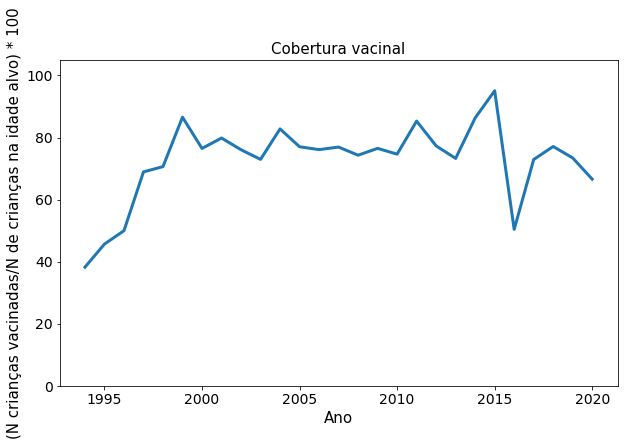

In [40]:
ax = cobertura_reg_ano.iloc[-1,:-1].plot(figsize = (10, 6), linewidth = 3)
plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], 
         xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
plt.title("Cobertura vacinal", fontsize = 15)
plt.ylabel("(N crianças vacinadas/N de crianças na idade alvo) * 100", 
           fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.set_ylim(0, 105)
#plt.axhline(y = 90, color='red', linestyle='--')
plt.show()

**Nota: N crianças vacinadas corresponde ao N de crianças vacinadas com esquema completo de imunização para cada tipo de imunizante.**

Agora temos dados mais interessantes para trabalhar. A cobertura vacinal diz mais a respeito sobre sobre indicadores da qualidade e atingimento das metas de vacinação do que o número total de doses. Será que uma parcela significativa das crianças está sendo vacinada corretamente? Qual é essa meta? As metas costumam variar de [80 a 100%](https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf) de crianças vacinadas, a depender do tipo de [imunizante](https://revistapesquisa.fapesp.br/as-razoes-da-queda-na-vacinacao/). Os valores de 80% são associadas com as vacinas de HPV e Influenza, vacinas recentemente desenvolvidas e de público alvo menos amplo. Podemos considerar um mímino de 90% de meta de cobertua vacinal "unificada", e olhar esse valor no gráfico:

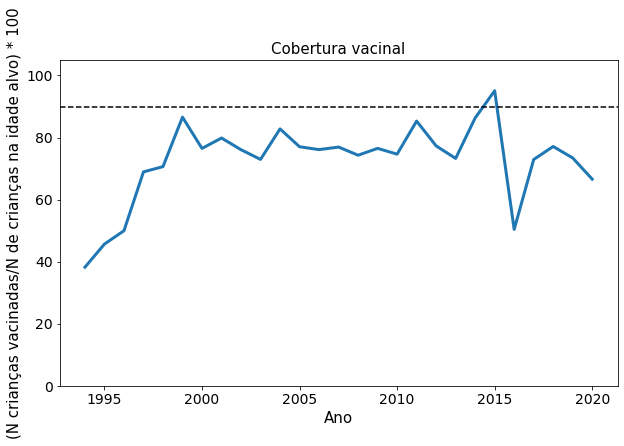

In [49]:
ax = cobertura_reg_ano.iloc[-1,:-1].plot(figsize = (10, 6), linewidth = 3)
plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], 
         xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
plt.title("Cobertura vacinal", fontsize = 15)
plt.ylabel("(N crianças vacinadas/N de crianças na idade alvo) * 100", 
           fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.set_ylim(0, 105)
plt.axhline(y = 90, color='black', linestyle='--')
plt.show()

Agora fica mais claro ainda que nos últimos anos tivemos uma queda grave na cobertura vacinal. A tendência dos últimos 5 anos, com um **forte** declínio no ano de 2015. Novamente, podemos olhar para esses valores por região.

**Devido à escala, agora fica mais fácil de visualizar todas regiões no mesmo gráfico:**

In [42]:
cobertura_reg_ano_nt = cobertura_reg_ano.drop(index = "Total", columns = " Total")

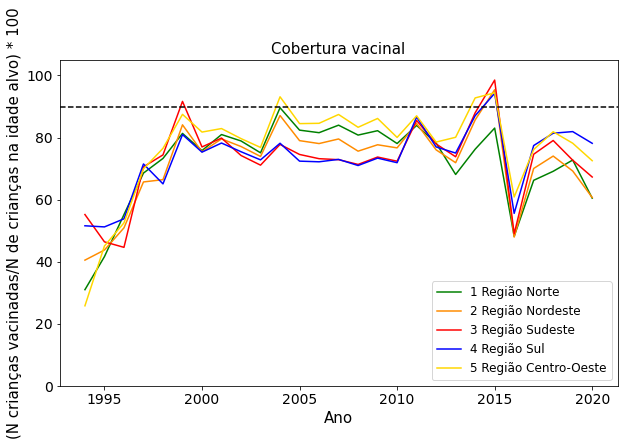

In [50]:
ax = cobertura_reg_ano_nt.T.plot(figsize = (10,6), color = cores)
plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], 
         xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
plt.title("Cobertura vacinal", fontsize = 15)
plt.ylabel("(N crianças vacinadas/N de crianças na idade alvo) * 100", 
           fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.set_ylim(0, 105)
plt.axhline(y = 90, color='black', linestyle='--')
ax.legend(fontsize = "large")
plt.show()

Novamente, não parece haver muita distinção entre regiões, demonstrando uma certa unidade nos valores de cobertura vacinal, mas não no total de doses, por região.

# Vacinas mais comuns

In [18]:
total_imuno_ob_nt = total_imuno_ob.drop(index = "Total")
total_imuno_ob_nt.index

Index(['BCG (BCG)', 'BCG - Hanseníase (BCG)', 'Febre Amarela (FA)',
       'Hepatite A (HA)', 'Hepatite B (HB)', 'Influenza (INF)', 'Varicela',
       'Dupla Adulto (dT)', 'Dupla Infantil (DT)',
       'Poliomielite inativada (VIP)', 'Meningocócica Conjugada - C (MncC)',
       'Oral Poliomielite (VOP)', 'Oral de Rotavírus Humano (VORH)',
       'Pentavalente (DTP+HB+Hib) (PENTA)', 'Pneumocócica 10valente',
       'Tetravalente (DTP/Hib) (TETRA)', 'Tríplice Bacteriana (DTP)',
       'Tríplice Viral (SCR)',
       'Tetraviral (sarampo, rubéola, caxumbae varicela)',
       'HPV Quadrivalente - Feminino', 'HPV Quadrivalente - Masculino', 'HPV'],
      dtype='object', name='Imunobiológicos')

In [19]:
total_imuno_ob_nt = total_imuno_ob_nt.sort_values(by=["Doses_aplicadas"], ascending = False)
total_imuno_ob_nt["Vacina"] = total_imuno_ob_nt.index

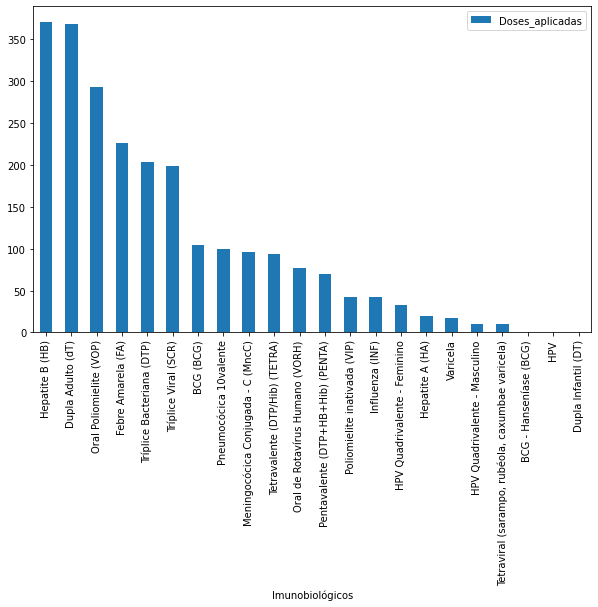

In [20]:
total_imuno_ob_nt.plot(kind = "bar", figsize = (10, 6))
#plt.legend(bbox_to_anchor = (1.1, 1.2))

# Por região, ia ser mais influenciada pela população, não seria possível detectar tendências diferentes.

In [28]:
cobertura_imuno_total = cobertura_imuno_ano.iloc[:-2,-1].copy()
cobertura_imuno_total = cobertura_imuno_total.sort_values(ascending = False)

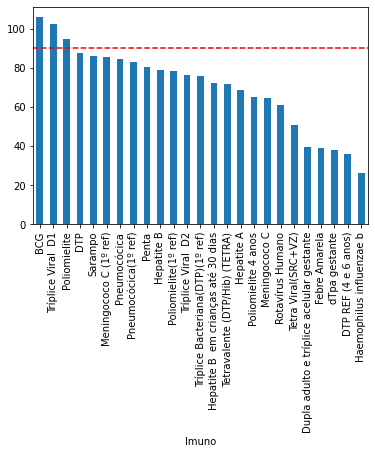

In [29]:
cobertura_imuno_total.plot(kind = "bar")
plt.axhline(y = 90, color = 'red', linestyle='--')

# Fazer agora cobertura por ano, de 2014 pra cá:

In [30]:
cobertura_imuno_ano_nt = cobertura_imuno_ano.iloc[:-2, 20:27]

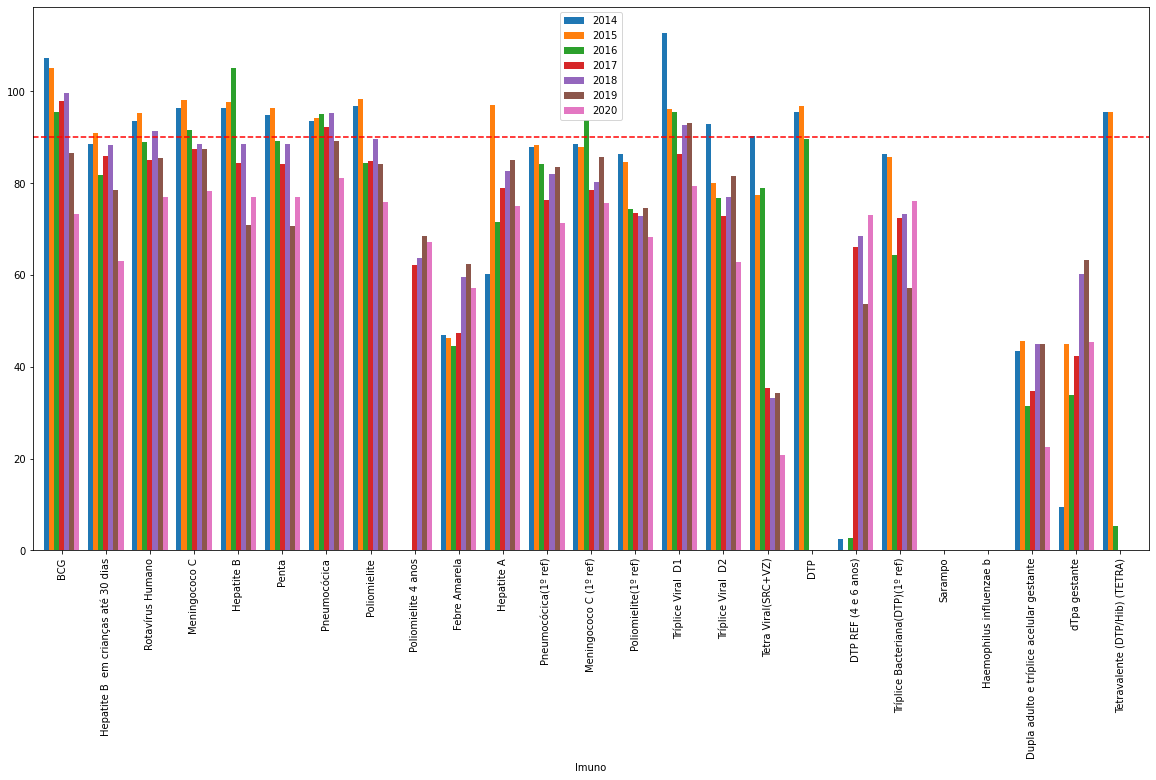

In [31]:
ax = cobertura_imuno_ano_nt.plot(kind = "bar", figsize = (20, 10), width = 0.8)
plt.axhline(y = 90, color='red', linestyle='--')